<a href="https://colab.research.google.com/github/Nakiyah24/ExplainableAI_Assignments/blob/main/Assignment2/Assignment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
## Interpretable ML

In [2]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from statsmodels.nonparametric.smoothers_lowess import lowess
from pygam import LogisticGAM, s, f
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    average_precision_score,
)

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Data Inspection and CLeaning

In [5]:
# Load Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/Nakiyah24/ExplainableAI_Assignments/refs/heads/main/Assignment2/WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

In [6]:
# Inspection 1: View Data
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Inspection 2
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [8]:
# Inspection 3
# Overview
display(df.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Inspection 4
# Viewing the typoe of unique values for all data
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column: gender
['Female' 'Male']
----------------------------------------
Column: SeniorCitizen
[0 1]
----------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: OnlineSecurity
['No

In [10]:
# Inspection 5
# View object data types
display("Data types of each feature", df.dtypes)

'Data types of each feature'

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [11]:
# Converting total charges to numeric from obejct dtype
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))

In [12]:
# Inspection 6
# Count of missing values for all columns
print(df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [13]:
# Remove missing TotalCharges and Recheck
df = df[df["TotalCharges"].notna()].copy()
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
# Final count of values
print("Final shape:", df.shape)

Final shape: (7032, 21)


Based on the overall overview, we can see the following:

**Outcome Variable:**

Churn: No, Yes

**Predictor Variable:**
**Categorical**

1. gender: Female, Male

2. SeniorCitizen: 0, 1

3. Partner: Yes, No

4. Dependents: Yes, No

5. PhoneService: Yes, No

6. MultipleLines: No Phone Service, No, Yes

7. InternetService: DSL, Fiber optic, No

8. OnlineSecurity: No, Yes, No internet service

9. OnlineBackup: No, Yes, No internet service

10. DeviceProtection: No, Yes, No internet service

11. TechSupport: No, Yes, No internet service

12. StreamingTV: No, Yes, No internet service

13. StreamingMovies: No, Yes, No internet service

14. Contract: Month-to-month, one year, two year

15. PaperlessBilling: Yes, No

16. PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

**Predictor Variable:**
**Continuous**
1. tenure

2. MonthlyCharges

3. TotalCharges


In [15]:
## Manually coding features for simplicity

categorical_col = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_col = ["tenure", "MonthlyCharges", "TotalCharges"]

outcome_col = ["Churn"]

main_df = df[categorical_col + numerical_col + outcome_col]
# Check data types of the selected columns
print(main_df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [16]:
main_df[categorical_col] = main_df[categorical_col].astype("category")

# Check data types of the selected columns
print(main_df.dtypes)

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
tenure                 int64
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


/tmp/ipython-input-2705850245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[categorical_col] = main_df[categorical_col].astype("category")


## Exploratory Data Analysis (EDA)

### 2.1: Target Distribution

/tmp/ipython-input-4004041539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


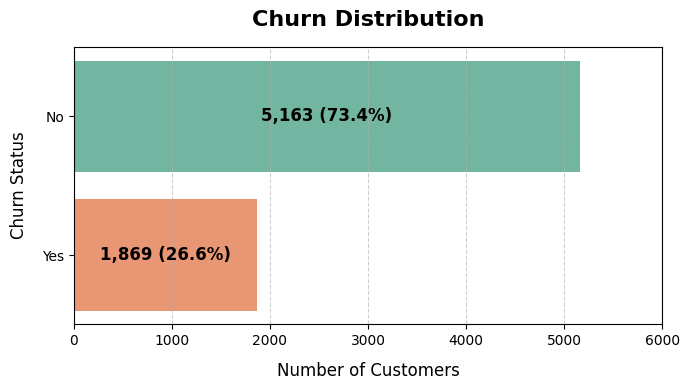

In [17]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(
    y="Churn",
    data=df,
    order=df["Churn"].value_counts().index,
    palette="Set2",
)

total = len(df)
for p in ax.patches:
    count = int(p.get_width())
    percentage = 100 * count / total
    label = f"{count:,} ({percentage:.1f}%)"

    ax.text(
        p.get_width() / 2,
        p.get_y() + p.get_height() / 2,
        label,
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="black",
    )

# Extend axis to 6000
ax.set_xlim(0, 6000)

# Titles and labels
plt.title("Churn Distribution", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Number of Customers", fontsize=12, labelpad=10)
plt.ylabel("Churn Status", fontsize=12, labelpad=10)

# Add a box (spines as border)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")

# Grid
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

The churn distribution above reveals that 26.6% of customers left the current compamy for a competitor while 73.4% retained their service. This shows that although most customers are retained, churn still represents a significant portion of the customer base.

### 2.2 Categorical Features vs Churn

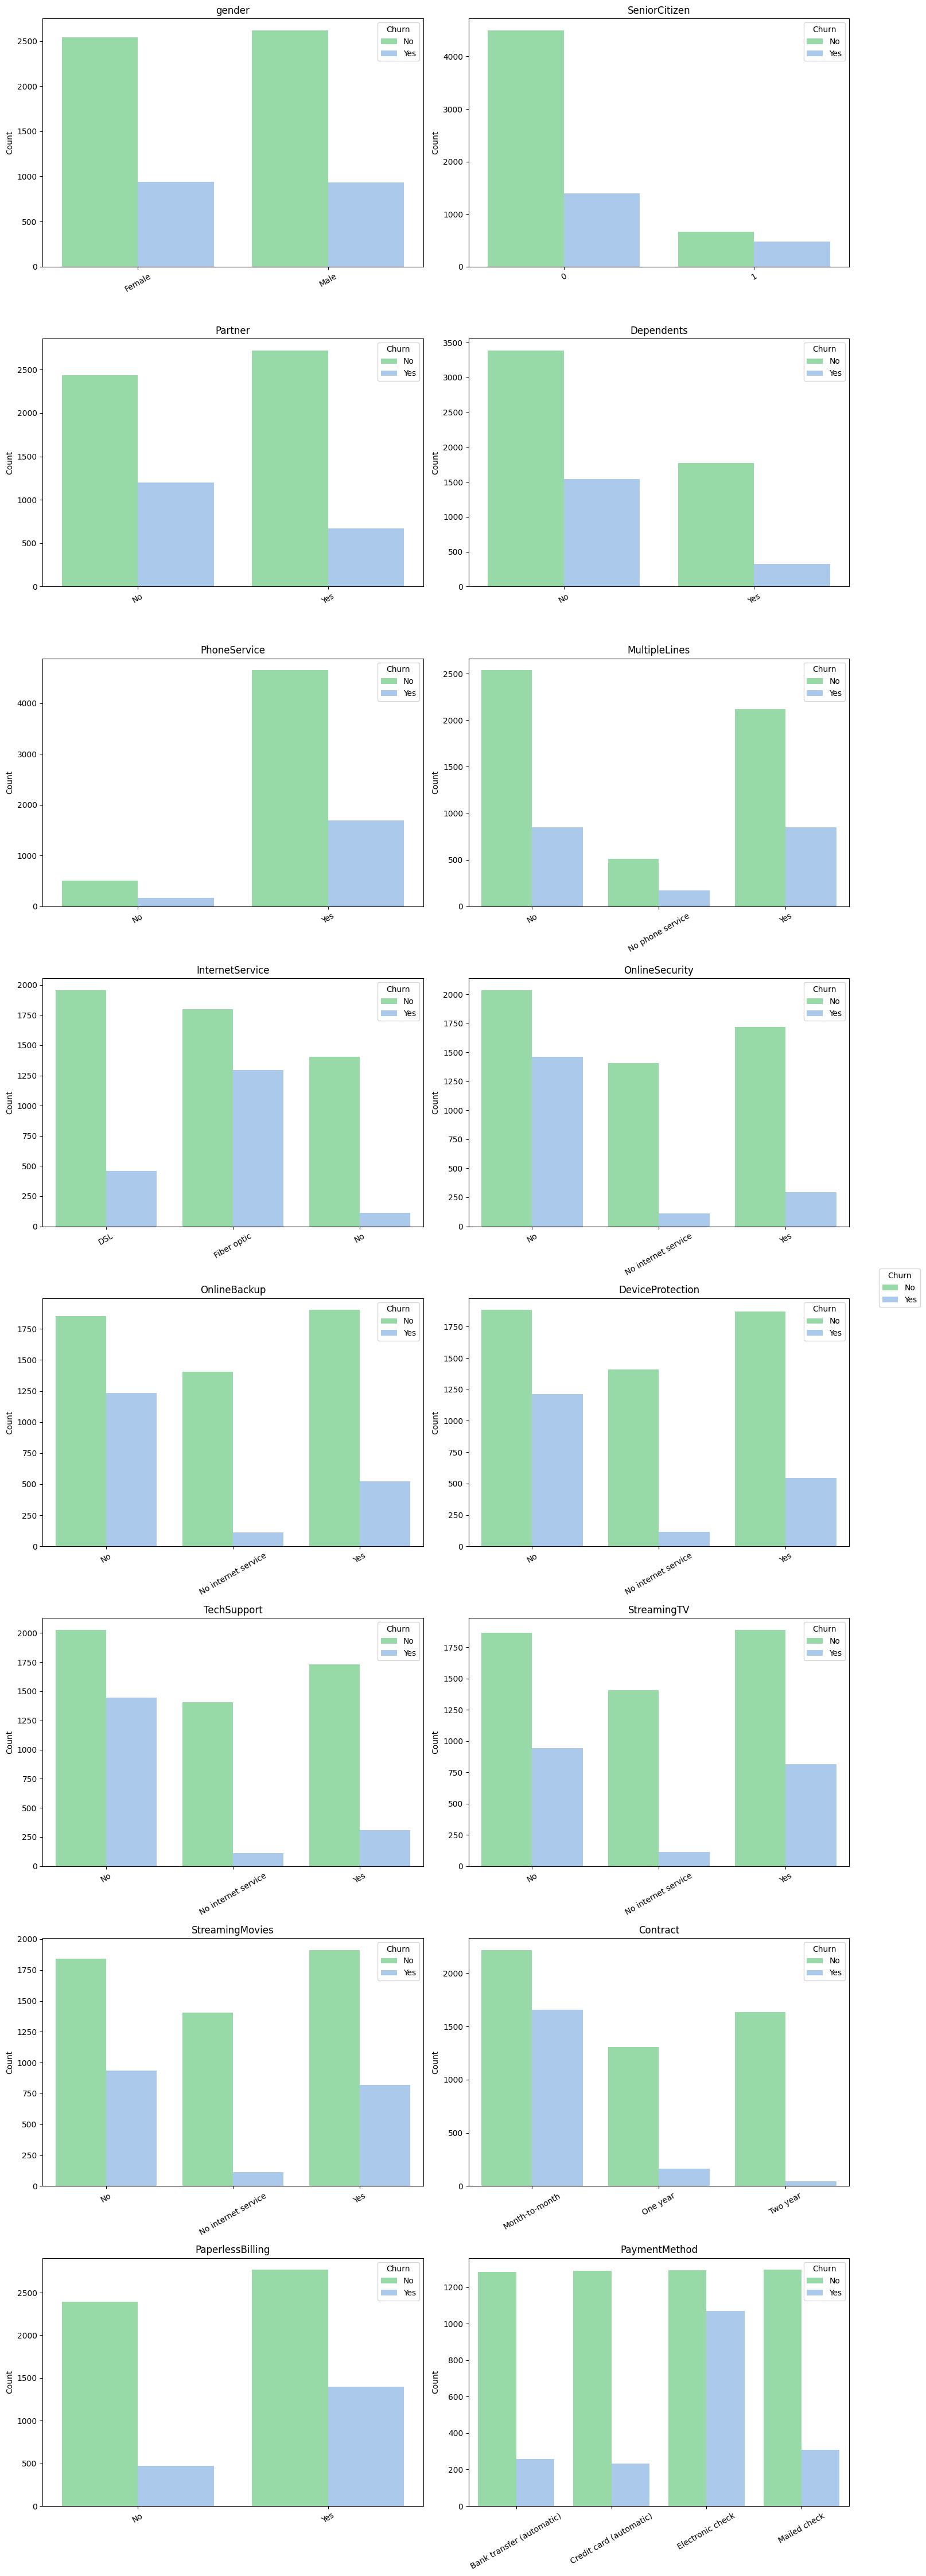

In [18]:
def plot_categorical_grid_side_by_side(df, cat_cols, outcome="Churn"):
    n = len(cat_cols)
    ncols = 2
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows,
        ncols,
        figsize=(
            15,
            # nrows * 4
            45,
        ),
    )
    axes = axes.flatten()

    # pick a nice contrasting palette
    palette = {
        "No": sns.color_palette("pastel")[2],
        "Yes": sns.color_palette("pastel")[0],
    }

    for i, col in enumerate(cat_cols):
        sns.countplot(x=col, hue=outcome, data=df, palette=palette, ax=axes[i])

        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis="x", rotation=30)

    # remove empty subplot(s) if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # one common legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles, labels, title=outcome, bbox_to_anchor=(1.02, 0.5), loc="center left"
    )
    fig.tight_layout()
    plt.show()


plot_categorical_grid_side_by_side(main_df, categorical_col, outcome="Churn")

Overall, looking at the churn count of categorical data, we can see that high churn is most common among senior citizens, customers without partners or dependents, those using fiber optic internet, and customers lacking online security, backup, device protection, or tech support services. In addition, month-to-month contract customers and those using paperless billing with electronic checks seem to be more likely to churn.

In contrast, low churn is observed among families with partners and dependents, customers using DSL or with no internet service, and those who subscribe to support or security add-ons. Furthermore, long-term contracts and non-paperless automatic payment methods are strong indicators of customer retention.

### 2.3: Numerical Features (Histograms & Boxplots)

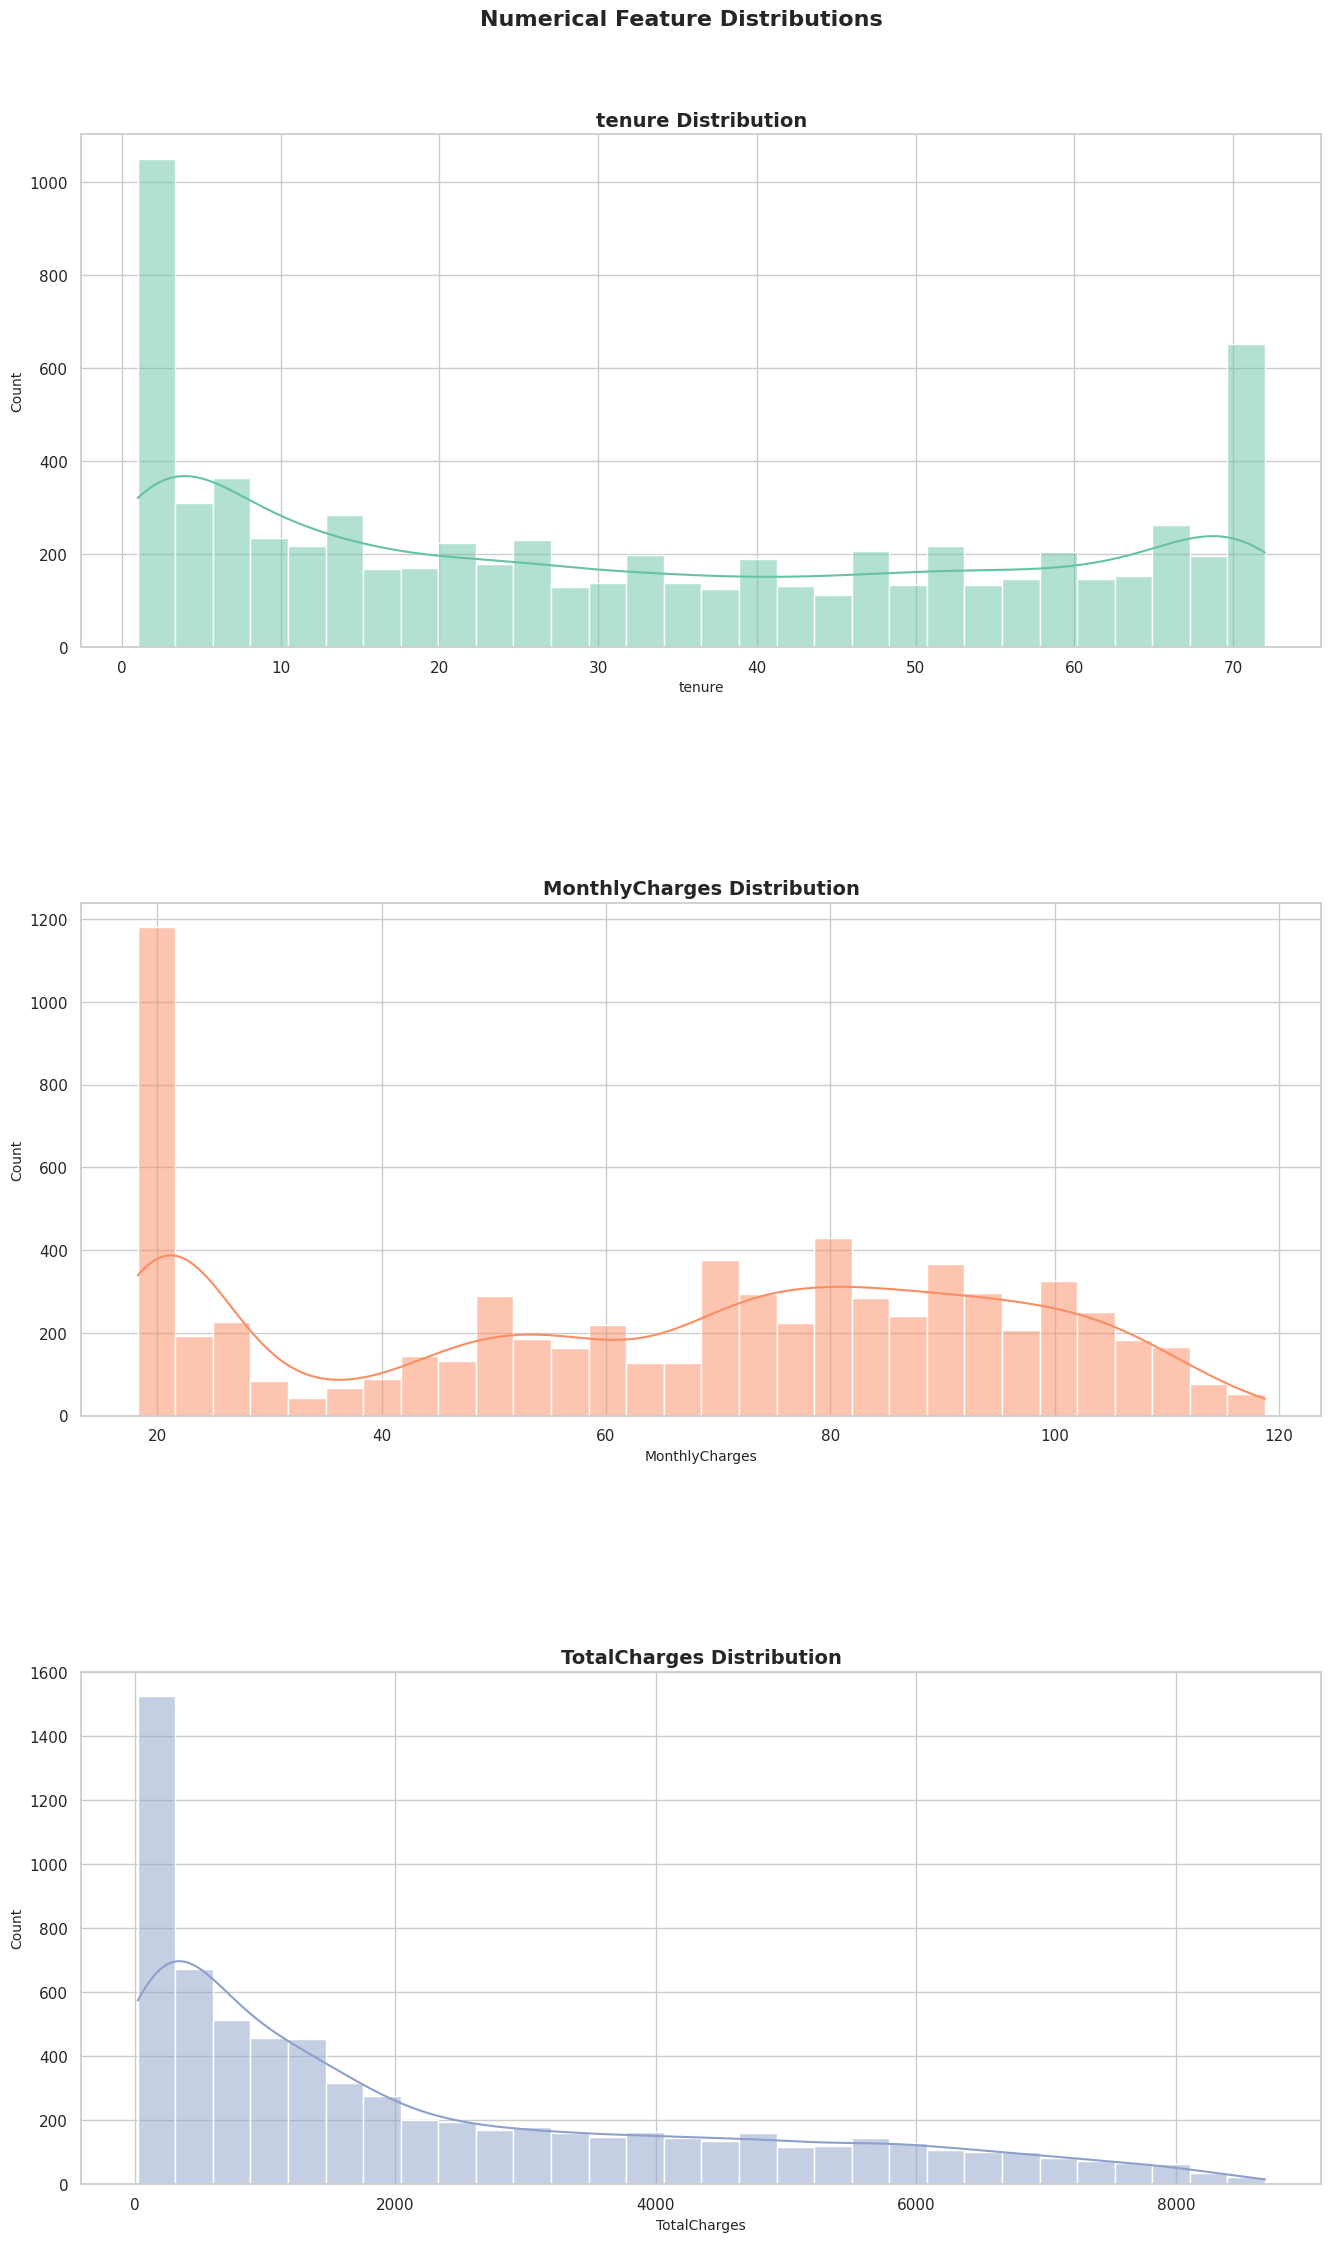

In [19]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot
fig, axes = plt.subplots(len(numerical_col), 1, figsize=(16, 25))

for i, col in enumerate(numerical_col):
    sns.histplot(
        data=main_df,
        x=col,
        bins=30,
        kde=True,
        color=sns.color_palette("Set2")[i],
        ax=axes[i],
    )
    axes[i].set_title(f"{col} Distribution", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)

plt.suptitle("Numerical Feature Distributions", fontsize=16, fontweight="bold")

# Adjust spacing
plt.subplots_adjust(hspace=0.5, top=0.93)  # hspace controls vertical gap
plt.show()

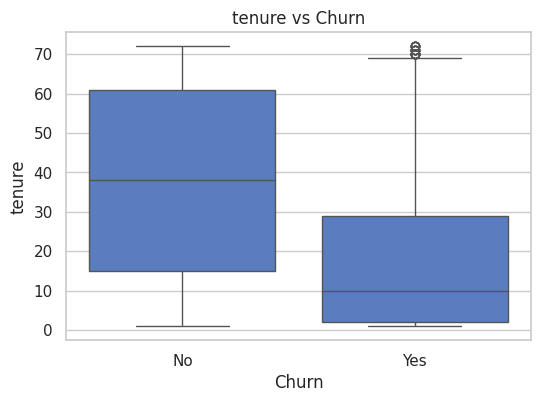

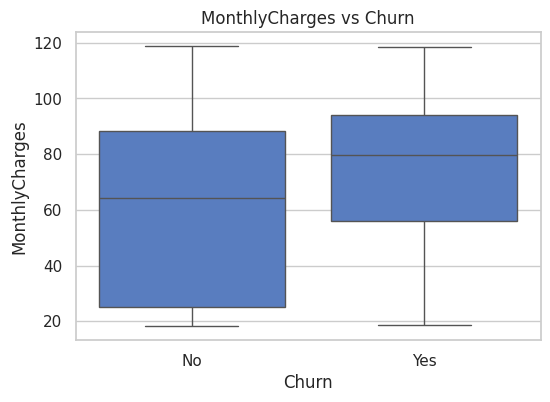

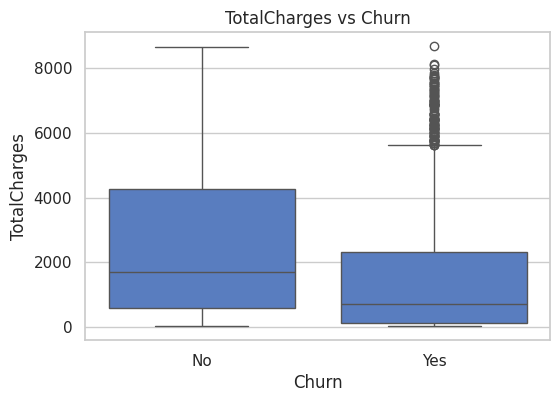

In [20]:
# Boxplots by churn
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Churn", y=col, data=main_df)
    plt.title(f"{col} vs Churn")
    plt.show()

The box plots and the histogram of numerical features shows clear differences between churners and non-churners.

- Customers with shorter tenure are far more likely to leave, while those who have stayed for a long time represent a relativey more loyal base.
- Monthly charges reveal two groups: one at lower prices (around $20–30) and another at higher prices (around $70–100). Customers paying higher monthly fees are more likely to churn.
- Total charges are strongly skewed toward lower values since many customers are new, whereas high total charges are only seen among long-tenured customers who tend to remain loyal.

Overall, churn is most common among new customers on higher monthly charges, while long-term, high-spending customers are the most stable segment.

### 2.4: Correlation Heatmap

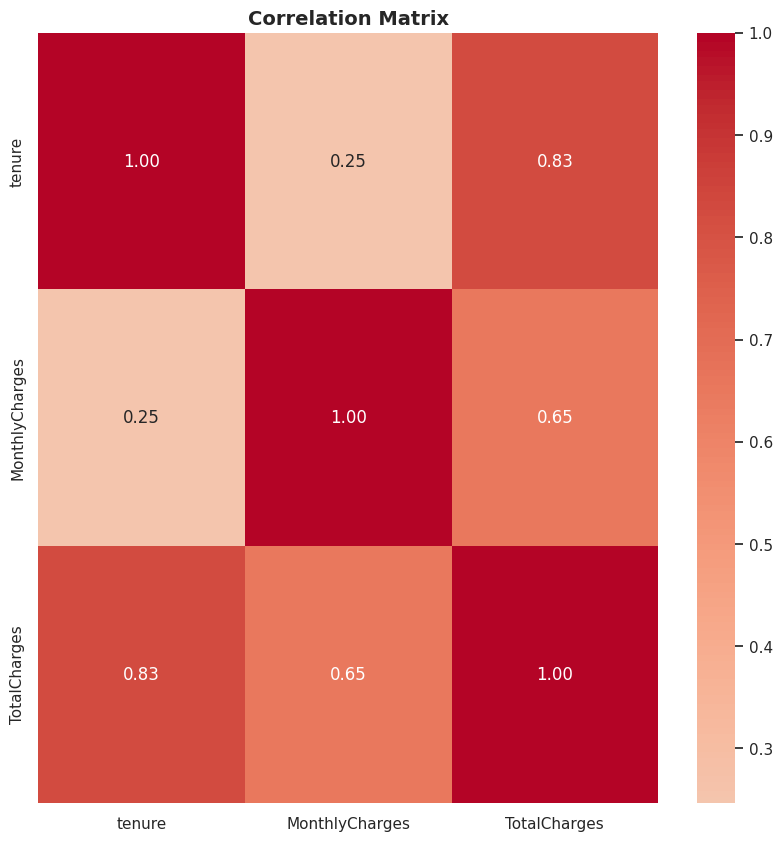

In [21]:
# Select only numerical columns + churn
corr = main_df[numerical_col].corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.show()

The correlation heatmap shows that TotalCharges is very strongly correlated with tenure (0.83) and also strongly correlated with MonthlyCharges (0.65). This makes sense because TotalCharges is essentially the product of tenure and monthly charges. Including all three together would introduce multicollinearity and make regression coefficients unstable.

To address this, I will drop TotalCharges from the modeling stage and continue with tenure, monthly charges, and the categorical predictors. This would still help the model remain interpretable without redundant information.

In this section we will treat the churn variable as continuous and build a linear model that will help to predict the churn of a customer.

### Linear Regression Modeling and EDA

In [22]:
# Updating numeric features after dropping TotalCharges
updated_numerical_col = ["tenure", "MonthlyCharges"]

# Target and features
main_df["ChurnFlag"] = main_df["Churn"].map({"No": 0, "Yes": 1})
X = main_df[categorical_col + updated_numerical_col].copy()
y = main_df["ChurnFlag"].astype(float)

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True, dtype=float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Fit OLS
X_train_const = sm.add_constant(X_train, has_constant="add")
ols = sm.OLS(y_train, X_train_const).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              ChurnFlag   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     94.70
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:59:25   Log-Likelihood:                -2293.7
No. Observations:                5274   AIC:                             4633.
Df Residuals:                    5251   BIC:                             4785.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

The OLS regression model explains about 28% of the variation in churn (R² = 0.284), which indicates a modest level of explanatory power. The results show that tenure has a strong negative effect, suggesting that customers with longer service duration are less likely to churn. Senior citizens are more likely to leave, while having dependents reduces churn risk. Long-term contracts, particularly one-year and two-year agreements, are associated with lower churn. Service-related factors such as fiber optic internet, streaming services, paperless billing, and electronic check payments show positive coefficients, indicating higher churn among these groups. By contrast, features such as gender, partner status, monthly charges, credit card payments, and mailed checks are not statistically significant predictors. Dropping TotalCharges simplified the model and reduced overlap with other predictors, while still capturing the main churn patterns identified during EDA. The next step is to evaluate model performance on the test set and then examine whether the assumptions of linear regression hold.

In [23]:
# Test set evaluation for OLS model

X_test_const = sm.add_constant(X_test, has_constant="add")
y_pred_cont = ols.predict(X_test_const)

# convert predictions to 0/1 using threshold = 0.5, then check accuracy
print(
    f"\nOLS Test Accuracy: {accuracy_score(y_test, (y_pred_cont >= 0.5).astype(int)):.3f}"
)

# use continuous predictions to calculate ROC-AUC (how well model separates churners vs non-churners)
print(f"OLS Test ROC-AUC:  {roc_auc_score(y_test, y_pred_cont):.3f}")

# check the range of predictions
# important because OLS can produce invalid <0 or >1 values
print(f"Prediction range:   {y_pred_cont.min():.3f} to {y_pred_cont.max():.3f}")


OLS Test Accuracy: 0.800
OLS Test ROC-AUC:  0.834
Prediction range:   -0.232 to 0.791


### Test Set Evaluation

On the test set, the OLS model achieved an accuracy of 80.0% and a ROC-AUC of 0.834, suggesting the model can separate churners from non-churners fairly well. However, the predicted values ranged from −0.232 to 0.791, which falls outside the valid probability range of 0 to 1. This reinforces that while the model provides some predictive power, linear regression is not ideal for binary classification problems like churn.

### Transition to Assumption Checks

To further assess the appropriateness of using linear regression in this context, I will now examine whether the core assumptions of linear regression are satisfied. These include linearity, independence, homoscedasticity, and normality of residuals.


### Evaluating These Assumptions

- **Linearity**: Use scatter plots of predictors vs. churn and check if the relationship looks roughly linear.  
- **Independence**: We are assuming the customers are independent  
- **Homoscedasticity**: Plot residuals vs. fitted values; the spread should be random and not form patterns.  
- **Normality**: Use a Q–Q plot of residuals; points should follow the diagonal line if residuals are normally distributed.  

#### Step 1: Linearity Check

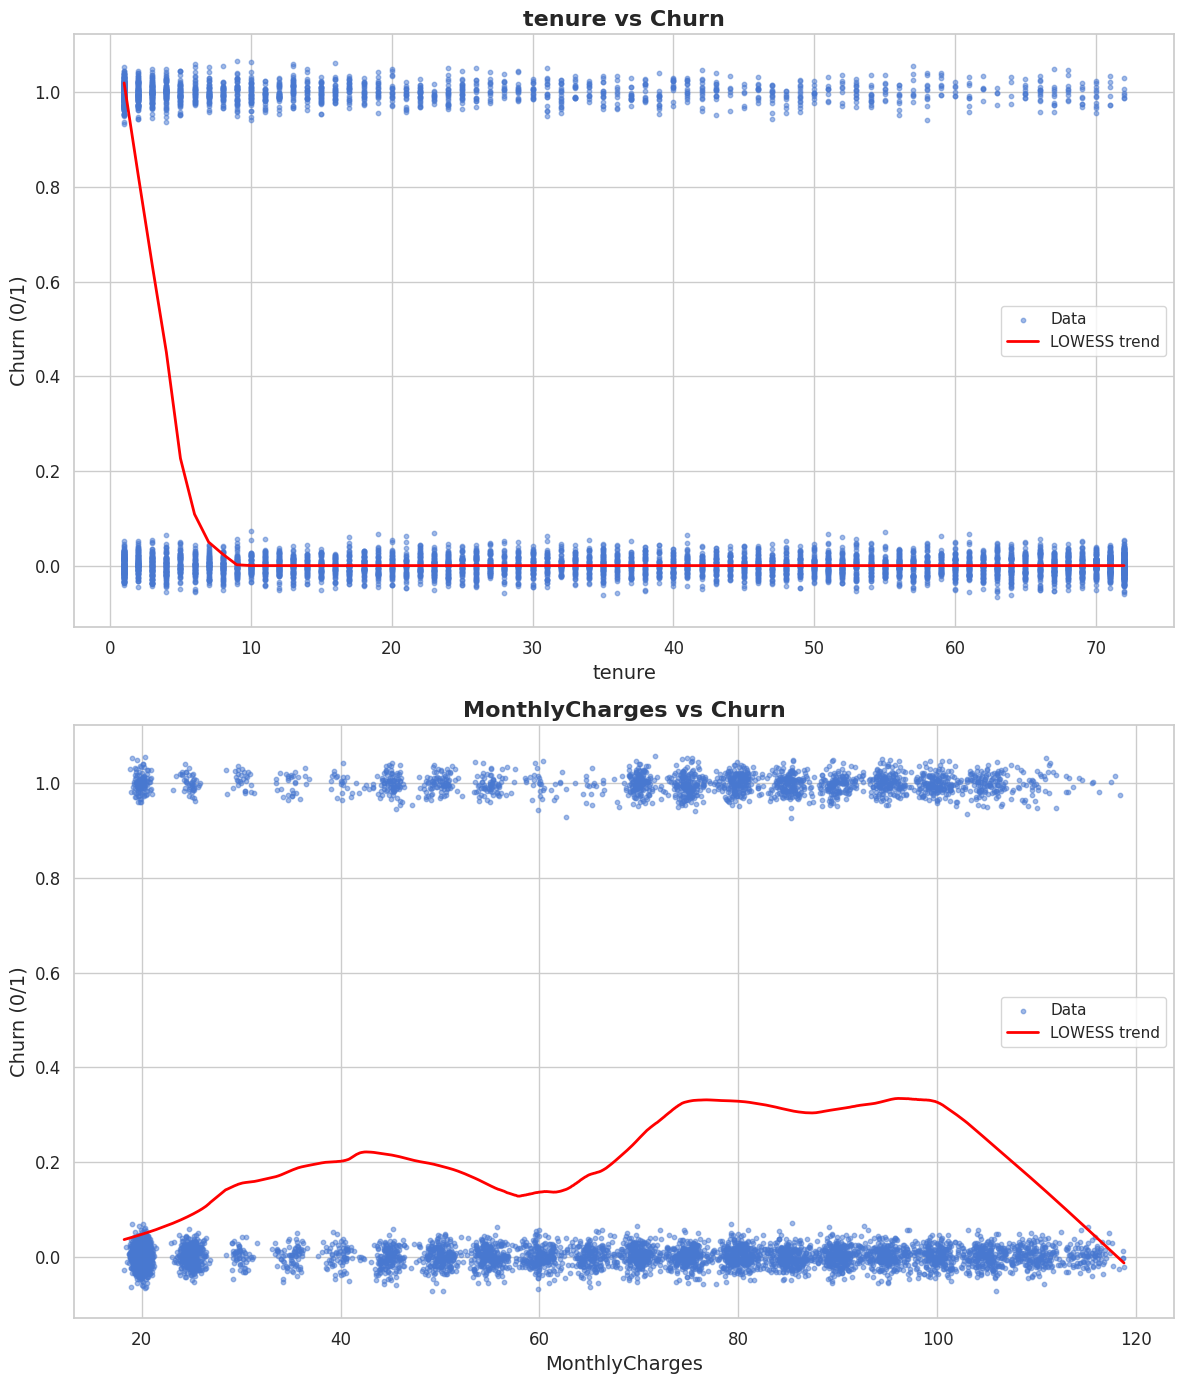

In [24]:
fig, axes = plt.subplots(len(updated_numerical_col), 1, figsize=(12, 14), sharey=True)

for i, col in enumerate(updated_numerical_col):
    y = main_df["ChurnFlag"]
    y_jitter = y + np.random.normal(0, 0.02, size=len(y))  # jitter for visibility
    axes[i].scatter(main_df[col], y_jitter, alpha=0.5, s=10, label="Data")

    # LOWESS smoothing
    smoothed = lowess(y, main_df[col], frac=0.25)
    axes[i].plot(
        smoothed[:, 0], smoothed[:, 1], color="red", linewidth=2, label="LOWESS trend"
    )

    # labels and formatting
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Churn (0/1)", fontsize=14)
    axes[i].set_title(f"{col} vs Churn", fontsize=16, fontweight="bold")
    axes[i].tick_params(axis="both", labelsize=12)
    axes[i].legend()

plt.tight_layout()
plt.show()

Customers with low tenure churn much more, but the risk drops sharply within the first few months and then stabilizes, as shown by the LOWESS curve. For monthly charges, churn increases at higher costs but the trend is uneven rather than straight. Overall, the plots confirm non-linear relationships between churn and the numerical features.

#### Step 2: Homoscedasticity check -- constant variance of residuals

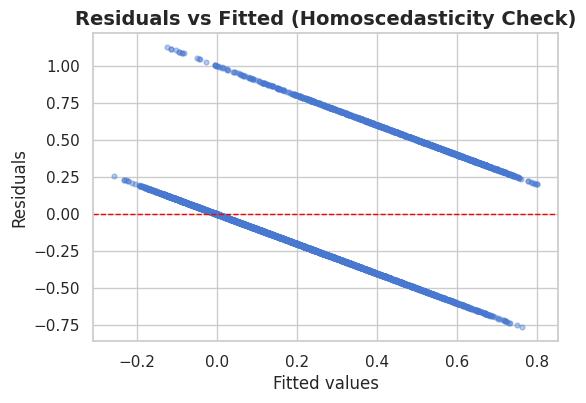

In [25]:
fitted = ols.fittedvalues
resid = ols.resid

plt.figure(figsize=(6, 4))
plt.scatter(fitted, resid, alpha=0.4, s=12)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Fitted values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title(
    "Residuals vs Fitted (Homoscedasticity Check)", fontsize=14, fontweight="bold"
)
plt.show()

The residuals vs fitted plot shows two clear bands instead of a random cloud, and the spread of residuals changes across fitted values. This indicates that the variance of residuals is not constant, indicating the homoscedasticity assumption is not satisfied.

#### Step 3: Normality of Residuals

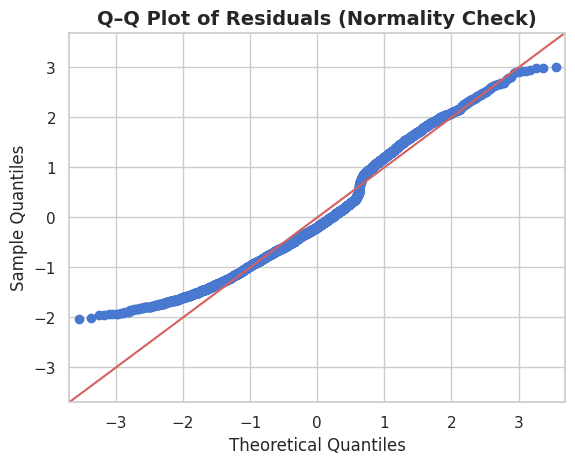

In [26]:
resid = ols.resid

# Q–Q plot
sm.qqplot(resid, line="45", fit=True)
plt.title("Q–Q Plot of Residuals (Normality Check)", fontsize=14, fontweight="bold")
plt.show()

The Q–Q plot shows that the residuals deviate from the diagonal line, particularly in the tails. This indicates that the residuals are not normally distributed, meaning the normality assumption of linear regression is not satisfied.

#### Eulticollinearity check (VIF test)

In [27]:
# Rebuild the design matrix used in OLS (with constant added)
X_train_const = sm.add_constant(X_train, has_constant="add")

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_const.values, i)
    for i in range(X_train_const.shape[1])
]

print(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature         VIF
0                                   const    0.000000
1                                  tenure    2.802171
2                          MonthlyCharges  876.673666
3                             gender_Male    1.003960
4                         SeniorCitizen_1    1.151812
5                             Partner_Yes    1.457265
6                          Dependents_Yes    1.377271
7                        PhoneService_Yes         inf
8          MultipleLines_No phone service         inf
9                       MultipleLines_Yes    7.306355
10            InternetService_Fiber optic  150.199022
11                     InternetService_No         inf
12     OnlineSecurity_No internet service         inf
13                     OnlineSecurity_Yes    6.390885
14       OnlineBackup_No internet service         inf
15                       OnlineBackup_Yes    6.750538
16   DeviceProtection_No internet service         inf
17                   DeviceP

The VIF analysis shows that several predictors suffer from very high multicollinearity. For example, MonthlyCharges has an extremely high VIF (~877), and some service-related dummy variables (e.g., InternetService_Fiber optic, StreamingTV_Yes, StreamingMovies_Yes) also have very high VIF values. Many “No internet service” and “No phone service” dummies show infinite VIFs, which happens because they are perfectly collinear with other dummy variables. These results confirm that the model has serious multicollinearity issues, making some coefficients unstable and difficult to interpret.

Given the strong multicollinearity and the large number of weak or redundant features, I will next apply LASSO regression. LASSO adds a penalty to the regression that shrinks less important coefficients to zero, effectively performing feature selection. This helps reduce multicollinearity, simplifies the model, and focuses on the most relevant predictors for churn.

### LASSO Regression

In [28]:
# LASSO = L1-penalized logistic regression with cross-validation
lasso_clf = Pipeline(
    [
        ("scaler", StandardScaler()),  # scale features
        (
            "logit",
            LogisticRegressionCV(
                penalty="l1",
                solver="saga",  # supports L1
                cv=5,
                scoring="roc_auc",
                max_iter=5000,
                n_jobs=-1,
                refit=True,
            ),
        ),
    ]
)

# fit on train
lasso_clf.fit(X_train, y_train)

# evaluate on test
proba = lasso_clf.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)
print(f"LASSO Logistic — Accuracy: {accuracy_score(y_test, pred):.3f}")
print(f"LASSO Logistic — ROC-AUC:  {roc_auc_score(y_test, proba):.3f}")

# which features survived (non-zero coefficients)?
coef = lasso_clf.named_steps["logit"].coef_[0]
coef_series = pd.Series(coef, index=X_train.columns)
kept = coef_series[coef_series != 0].sort_values()

print("\nSelected features (non-zero coefficients):")
print(kept)

LASSO Logistic — Accuracy: 0.803
LASSO Logistic — ROC-AUC:  0.840

Selected features (non-zero coefficients):
tenure                                 -0.768072
Contract_Two year                      -0.493952
Contract_One year                      -0.245262
OnlineSecurity_Yes                     -0.163104
TechSupport_Yes                        -0.158878
Dependents_Yes                         -0.095260
PhoneService_Yes                       -0.053405
OnlineBackup_Yes                       -0.050370
OnlineBackup_No internet service       -0.047077
DeviceProtection_No internet service   -0.047077
TechSupport_No internet service        -0.047077
StreamingTV_No internet service        -0.047077
OnlineSecurity_No internet service     -0.047077
StreamingMovies_No internet service    -0.047077
InternetService_No                     -0.047077
MultipleLines_No phone service          0.053405
SeniorCitizen_1                         0.065048
StreamingMovies_Yes                     0.107978
Multiple

### Rebuild Linear Regression using selected features from LASSO

In [29]:
# 1. Get features LASSO kept
selected_features = kept.index.tolist()

# 2. Rebuild X with only selected features
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Add constant
X_train_sel_const = sm.add_constant(X_train_sel, has_constant="add")
X_test_sel_const = sm.add_constant(X_test_sel, has_constant="add")

# Fit new OLS
ols_lasso = sm.OLS(y_train, X_train_sel_const).fit()
print(ols_lasso.summary())

                            OLS Regression Results                            
Dep. Variable:              ChurnFlag   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:59:53   Log-Likelihood:                -2296.0
No. Observations:                5274   AIC:                             4626.
Df Residuals:                    5257   BIC:                             4738.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [30]:
# 3. Evaluate on test set
y_pred_cont = ols_lasso.predict(X_test_sel_const)
y_pred_binary = (y_pred_cont >= 0.5).astype(int)

print(f"Reduced OLS Accuracy: {accuracy_score(y_test, y_pred_binary):.3f}")
print(f"Reduced OLS ROC-AUC:  {roc_auc_score(y_test, y_pred_cont):.3f}")
print(f"Prediction range:     {y_pred_cont.min():.3f} to {y_pred_cont.max():.3f}")

Reduced OLS Accuracy: 0.800
Reduced OLS ROC-AUC:  0.835
Prediction range:     -0.225 to 0.788


### Recheck Assumptions

#### Linearity

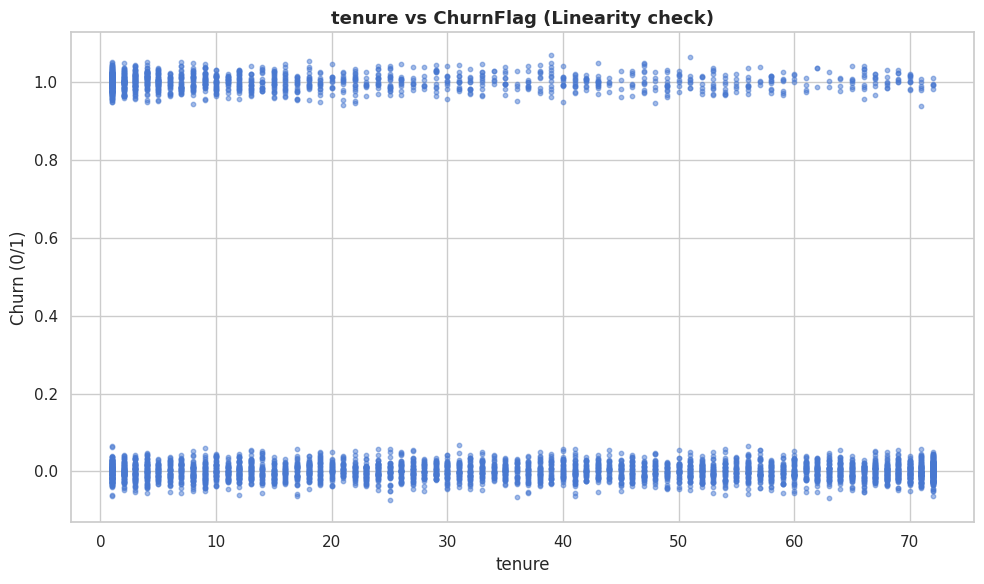

In [31]:
# numeric features you had after dropping TotalCharges
updated_numerical_col = ["tenure", "MonthlyCharges"]

# use only the numeric features that LASSO kept
num_sel = [c for c in updated_numerical_col if c in selected_features]
if len(num_sel) == 0:
    print("No numeric features were selected by LASSO.")
else:
    fig, axes = plt.subplots(len(num_sel), 1, figsize=(10, 6), sharey=True)
    if len(num_sel) == 1:
        axes = [axes]
    for ax, col in zip(axes, num_sel):
        y_jit = y_train + np.random.normal(0, 0.02, size=len(y_train))
        ax.scatter(X_train_sel[col], y_jit, s=10, alpha=0.5)
        ax.set_title(
            f"{col} vs ChurnFlag (Linearity check)", fontsize=13, fontweight="bold"
        )
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Churn (0/1)", fontsize=12)
        ax.tick_params(axis="both", labelsize=11)
    plt.tight_layout()
    plt.show()

#### Homoscedasticity

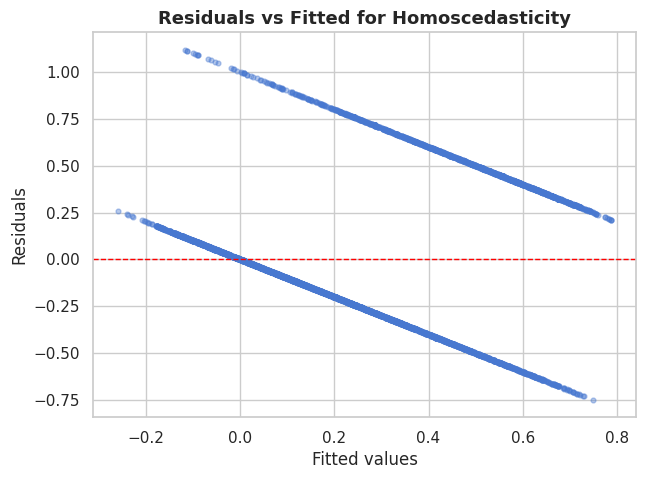

In [32]:
fitted = ols_lasso.fittedvalues
resid = ols_lasso.resid

plt.figure(figsize=(7, 5))
plt.scatter(fitted, resid, s=12, alpha=0.4)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Residuals vs Fitted for Homoscedasticity", fontsize=13, fontweight="bold")
plt.xlabel("Fitted values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.tick_params(axis="both", labelsize=11)
plt.show()

#### Normality of residuals

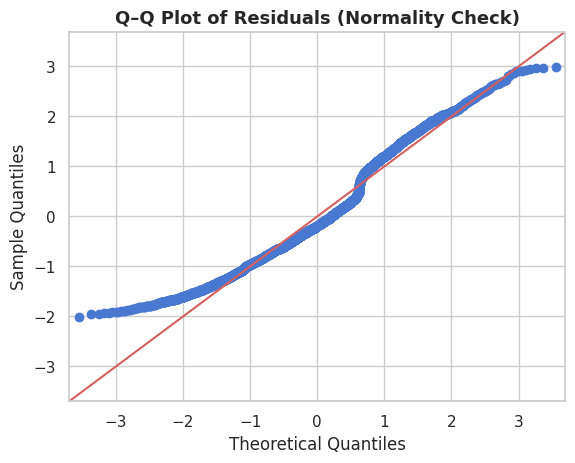

In [33]:
sm.qqplot(ols_lasso.resid, line="45", fit=True)
plt.title("Q–Q Plot of Residuals (Normality Check)", fontsize=13, fontweight="bold")
plt.show()

#### Multicollinearity

In [34]:
# design matrix used in ols_lasso
X_train_sel_const = sm.add_constant(X_train_sel, has_constant="add")
vif_df = pd.DataFrame(
    {
        "feature": X_train_sel_const.columns,
        "VIF": [
            variance_inflation_factor(X_train_sel_const.values, i)
            for i in range(X_train_sel_const.shape[1])
        ],
    }
)
print(vif_df)

                                 feature       VIF
0                                  const  0.000000
1                                 tenure  2.530044
2                      Contract_Two year  2.602983
3                      Contract_One year  1.617128
4                     OnlineSecurity_Yes  1.404052
5                        TechSupport_Yes  1.452336
6                         Dependents_Yes  1.110537
7                       PhoneService_Yes       inf
8                       OnlineBackup_Yes  1.365968
9       OnlineBackup_No internet service       inf
10  DeviceProtection_No internet service       inf
11       TechSupport_No internet service       inf
12       StreamingTV_No internet service       inf
13    OnlineSecurity_No internet service       inf
14   StreamingMovies_No internet service       inf
15                    InternetService_No       inf
16        MultipleLines_No phone service       inf
17                       SeniorCitizen_1  1.139386
18                   StreamingM

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


##### Analysis

I used LASSO logistic regression to select the most important predictors. To test whether simplifying the feature set could also improve OLS, I rebuilt a reduced linear regression model using only the LASSO-selected features. This was not meant as a practical model, but as a diagnostic check on whether assumption violations persisted.

The diagnostic checks showed essentially the same issues as before: relationships between predictors and churn remained non-linear, residuals continued to display heteroscedasticity, and the normality assumption was still violated. Multicollinearity was somewhat reduced, with lower VIF scores for several predictors, but many service-related dummy variables still exhibited infinite VIFs due to perfect collinearity.

In addition, test accuracy (0.80) and ROC-AUC (0.835) were virtually unchanged from the full model, indicating that trimming features simplified interpretation but did not improve predictive power or address the assumption violations. Overall, even after feature reduction, the assumptions of linear regression are not well satisfied, reinforcing the need to use logistic regression or GAMs, which may be better suited to binary churn prediction.

In the following section, I will model Logistic regression and GAM model with the LASSO selected features.

## Logistic Regression
Using LASSO selected features

In [35]:
# Keep only the features that LASSO selected
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

In [36]:
# Check multicollinearity (VIF)
X_vif = sm.add_constant(X_train_sel, has_constant="add")
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])
]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
                                 feature       VIF
0                                  const  0.000000
1                                 tenure  2.530044
2                      Contract_Two year  2.602983
3                      Contract_One year  1.617128
4                     OnlineSecurity_Yes  1.404052
5                        TechSupport_Yes  1.452336
6                         Dependents_Yes  1.110537
7                       PhoneService_Yes       inf
8                       OnlineBackup_Yes  1.365968
9       OnlineBackup_No internet service       inf
10  DeviceProtection_No internet service       inf
11       TechSupport_No internet service       inf
12       StreamingTV_No internet service       inf
13    OnlineSecurity_No internet service       inf
14   StreamingMovies_No internet service       inf
15                    InternetService_No       inf
16        MultipleLines_No phone service       inf
17                       SeniorCitizen_1  1.139

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


The VIF results show that most predictors fall in an acceptable range (≈1–3), but several dummy variables like “No internet service” or “No phone service” have infinite VIFs due to perfect collinearity with other categories. This means they are redundant and may make coefficient interpretation less stable. Dropping or merging these structural dummies would give a cleaner, more interpretable logistic regression.

In [37]:
# Drop redundant "no service" dummies
drop_cols = [
    col
    for col in X_train_sel.columns
    if "No internet service" in col or "No phone service" in col
]

print("Dropping redundant columns:", drop_cols)

X_train_clean = X_train_sel.drop(columns=drop_cols)
X_test_clean = X_test_sel.drop(columns=drop_cols)

# --- Recheck VIFs on the cleaned data ---
X_vif_clean = sm.add_constant(X_train_clean, has_constant="add")
vif_clean = pd.DataFrame(
    {
        "feature": X_vif_clean.columns,
        "VIF": [
            variance_inflation_factor(X_vif_clean.values, i)
            for i in range(X_vif_clean.shape[1])
        ],
    }
)
print("\nVIF after dropping redundant dummies:")
print(vif_clean)

Dropping redundant columns: ['OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'OnlineSecurity_No internet service', 'StreamingMovies_No internet service', 'MultipleLines_No phone service']

VIF after dropping redundant dummies:
                           feature        VIF
0                            const  17.079915
1                           tenure   2.530044
2                Contract_Two year   2.602983
3                Contract_One year   1.617128
4               OnlineSecurity_Yes   1.404052
5                  TechSupport_Yes   1.452336
6                   Dependents_Yes   1.110537
7                 PhoneService_Yes   1.362335
8                 OnlineBackup_Yes   1.365968
9               InternetService_No   2.576542
10                 SeniorCitizen_1   1.139386
11             StreamingMovies_Yes   1.599139
12               MultipleLines_Yes   1.422816
13                 StreamingTV_

With this reduced feature set, I will now fit a standard logistic regression with L2 regularization (the default in lbfgs). I am choosing L2 for two reasons:

Stability: L2 handles mild multicollinearity better than plain MLE logistic regression, so my coefficients don’t blow up.

Interpretability: Unlike L1, it doesn’t shrink coefficients all the way to zero, which means I can directly interpret odds ratios for the features that survived feature selection.

In [38]:
# Build Logistic Regression
logit_clean = LogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000, n_jobs=-1)
logit_clean.fit(X_train_clean, y_train)

# Evaluate on test set
proba_clean = logit_clean.predict_proba(X_test_clean)[:, 1]
pred_clean = (proba_clean >= 0.5).astype(int)

print("\nPerformance after dropping redundant dummies:")
print("Accuracy:", accuracy_score(y_test, pred_clean))
print("ROC-AUC:", roc_auc_score(y_test, proba_clean))
print("PR-AUC:", average_precision_score(y_test, proba_clean))


Performance after dropping redundant dummies:
Accuracy: 0.8071672354948806
ROC-AUC: 0.8390944058437843
PR-AUC: 0.625708137197275


After removing redundant dummy variables like “No internet service” and “No phone service” that the VIF test flagged as perfectly collinear, my logistic regression model achieved about 80.7% accuracy, a ROC-AUC of 0.84, and a PR-AUC of 0.63.
To better understand the drivers of churn beyond these performance metrics, I then refit the model in statsmodels, which allowed me to examine the coefficients directly and interpret them as odds ratios.

In [39]:
# Add constant
X_train_sm = sm.add_constant(X_train_clean, has_constant="add")

# Fit statsmodels Logit
logit_model = sm.Logit(y_train, X_train_sm).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.413766
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ChurnFlag   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5257
Method:                           MLE   Df Model:                           16
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2855
Time:                        12:59:56   Log-Likelihood:                -2182.2
converged:                       True   LL-Null:                       -3054.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.1688      0.145     -1.162     

In [40]:
# Odds ratios and 95% CI
params = logit_model.params
conf = logit_model.conf_int()
odds = pd.DataFrame(
    {"OR": np.exp(params), "CI_lower": np.exp(conf[0]), "CI_upper": np.exp(conf[1])}
)
print(odds)

                                      OR  CI_lower  CI_upper
const                           0.844649  0.635368  1.122862
tenure                          0.967469  0.962516  0.972448
Contract_Two year               0.262160  0.178037  0.386030
Contract_One year               0.506804  0.397816  0.645652
OnlineSecurity_Yes              0.663981  0.548495  0.803782
TechSupport_Yes                 0.667726  0.551978  0.807746
Dependents_Yes                  0.777160  0.646276  0.934550
PhoneService_Yes                0.596106  0.447968  0.793231
OnlineBackup_Yes                0.842670  0.709758  1.000472
InternetService_No              0.424489  0.311368  0.578708
SeniorCitizen_1                 1.213112  1.001458  1.469497
StreamingMovies_Yes             1.316675  1.100473  1.575353
MultipleLines_Yes               1.403584  1.173806  1.678342
StreamingTV_Yes                 1.371216  1.144814  1.642392
PaperlessBilling_Yes            1.383176  1.169071  1.636493
PaymentMethod_Electronic

On the whole, using scikit-learn, the logistic regression model achieved strong predictive performance on the test set: about 81% accuracy, a ROC-AUC of 0.84, and a PR-AUC of 0.63. To dig deeper into interpretability, I refit the same model in statsmodels, which reported a pseudo R² of about 0.29 and allowed me to examine coefficients and odds ratios. Several predictors came out as significant. Tenure had a strong negative effect (coef = –0.033, OR ≈ 0.97), meaning each extra month reduced the odds of churn by about 3%. Contract length was also very important: customers on one-year contracts had about half the odds of churn compared to month-to-month (OR ≈ 0.51), and those on two-year contracts were even less likely (OR ≈ 0.26). Add-on services helped too: having online security (OR ≈ 0.66) or tech support (OR ≈ 0.67) lowered churn. On the other hand, fiber optic internet was the biggest risk factor (coef = 0.91, OR ≈ 2.49), making customers more than twice as likely to churn compared to DSL. Other positive predictors included streaming TV (OR ≈ 1.37), streaming movies (OR ≈ 1.32), multiple lines (OR ≈ 1.40), paperless billing (OR ≈ 1.38), and paying by electronic check (OR ≈ 1.35). Senior citizens also had slightly higher odds of leaving (OR ≈ 1.21). Overall, the logistic regression model shows that long contracts and support services improve retention, while fiber internet, streaming, and certain payment methods are linked to higher churn.

Regardless, while the logistic regression model improved over OLS by producing valid probabilities and interpretable odds ratios, it still assumes that the log-odds of churn change in a straight-line way with continuous predictors such as tenure. Our earlier plots showed that this is not the case: churn risk drops sharply during the first few months of tenure and then levels off, and monthly charges also show a more uneven pattern. To capture these kinds of non-linear relationships more flexibly,we can make use of the Generalized Additive Model (GAM).

Thus, in the next step, I fit a GAM with smooth terms for continuous predictors and factor terms for the categorical variables to see whether accounting for non-linearity improves model performance and interpretability.

### Generalized Additive Model (GAM)

In [41]:
# Identify predictors
num_vars = ["tenure"]  # customer tenure in months (continuous)

cat_vars = [
    "Contract_Two year",  # contract: two-year plan
    "Contract_One year",  # contract: one-year plan
    "OnlineSecurity_Yes",  # has online security add-on
    "TechSupport_Yes",  # has tech support add-on
    "Dependents_Yes",  # has dependents
    "PhoneService_Yes",  # has phone service
    "OnlineBackup_Yes",  # has online backup add-on
    "InternetService_No",  # no internet service
    "SeniorCitizen_1",  # senior citizen indicator
    "StreamingMovies_Yes",  # streaming movies
    "MultipleLines_Yes",  # multiple phone lines
    "StreamingTV_Yes",  # streaming TV
    "PaperlessBilling_Yes",  # paperless billing
    "PaymentMethod_Electronic check",  # electronic check payment
    "InternetService_Fiber optic",  # fiber optic internet
]

# Reorder columns so indices align with terms: [tenure] + categorical dummies
ordered_cols = num_vars + cat_vars
missing = [c for c in ordered_cols if c not in X_train_clean.columns]
if missing:
    raise ValueError(
        f"These expected columns are missing from X_train_clean: {missing}"
    )

X_train_gam = X_train_clean[ordered_cols].copy()
X_test_gam = X_test_clean[ordered_cols].copy()

# Define GAM terms: s() for tenure (index 0), f() for each categorical (1..end)
terms = s(0)
for j in range(1, X_train_gam.shape[1]):
    terms += f(j)

# Fit GAM
gam = LogisticGAM(terms).fit(X_train_gam.values, y_train.values)

In [42]:
# Predictions and evaluation
proba_gam = gam.predict_proba(X_test_gam.values)
pred_gam = (proba_gam >= 0.5).astype(int)

print("GAM Performance:")
print("Accuracy:", accuracy_score(y_test, pred_gam))
print("ROC-AUC:", roc_auc_score(y_test, proba_gam))
print("PR-AUC:", average_precision_score(y_test, proba_gam))

GAM Performance:
Accuracy: 0.7997724687144482
ROC-AUC: 0.8442246353854805
PR-AUC: 0.6573671867392581


In [43]:
# Get GAM summary
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     28.3107
Link Function:                        LogitLink Log Likelihood:                                 -2124.7089
Number of Samples:                         5274 AIC:                                             4306.0392
                                                AICc:                                            4306.3781
                                                UBRE:                                               2.8208
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3043
Feature Function                  Lam

/tmp/ipython-input-1925033658.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


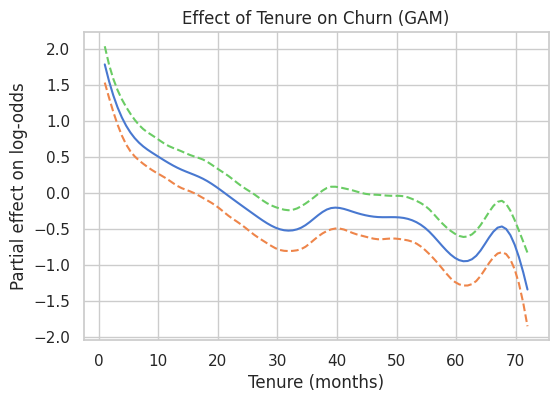

In [44]:
# GAM Plot
XX = gam.generate_X_grid(term=0)
plt.figure(figsize=(6, 4))
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=0.95)[1], ls="--")
plt.title("Effect of Tenure on Churn (GAM)")
plt.xlabel("Tenure (months)")
plt.ylabel("Partial effect on log-odds")
plt.show()

The GAM delivered strong results: about 80% accuracy, a ROC-AUC of 0.84, and a PR-AUC of 0.66, edging out logistic regression—especially in identifying churners. Its pseudo R² of 0.30 was also an improvement, showing the model explains more variation in churn. The smooth for tenure revealed a sharp drop in churn risk during the first 10 months, after which the risk levels off, capturing the clear non-linear pattern that logistic regression missed. For categorical features, the results lined up with what I saw in logistic: longer contracts, dependents, and support/security add-ons lowered churn, while fiber optic internet, streaming services, electronic check payments, and paperless billing raised it. Taken together, the GAM combines solid predictive performance with richer insight into non-linear effects—especially tenure—making it a valuable extension of the logistic model.

## Overall Summary and model comparison

In this assignment, I explored three approaches to predicting customer churn: linear regression, logistic regression, and generalized additive models (GAMs). The linear regression model explained about 28% of churn variation and achieved an accuracy of 80% and ROC-AUC of 0.83, but it violated core assumptions: residuals were heteroscedastic, non-normal, and multicollinearity was severe. LASSO helped simplify the model, but the underlying issues remained, confirming that OLS is not ideal for binary outcomes.

Logistic regression improved interpretability and prediction. The final model, after dropping redundant dummies, achieved 80.7% accuracy, a ROC-AUC of 0.84, and a PR-AUC of 0.63. The coefficients, interpreted as odds ratios, showed that long contracts, tenure, and support/security services reduced churn, while fiber optic internet, streaming services, electronic check payments, and paperless billing increased it. This model balanced predictive performance with clear interpretability.

The GAM extended logistic regression by allowing non-linear effects for continuous features. Its performance was slightly better (accuracy 80%, ROC-AUC 0.84, PR-AUC 0.66) and it revealed a sharp early decline in churn risk with tenure, flattening out for long-tenured customers. This captured the non-linearity that logistic regression could not.

On the whole, I believe that Logistic regression is a strong baseline because of its simplicity, interpretability, and solid predictive power. However, GAM adds value by modeling non-linear effects, especially tenure, without sacrificing interpretability.